Hypotheses:
H₀: mean = 50
H₁: mean ≠ 50 (two-tailed test)

Sample mean: 48.52
Sample standard deviation: 0.42
t-statistic: -11.1139
p-value: 0.0000015
Standard error of the mean (SEM): 0.1332
Reject the null hypothesis: the difference is statistically significant.
Critical value +/-: -2.2622 and 2.2622 


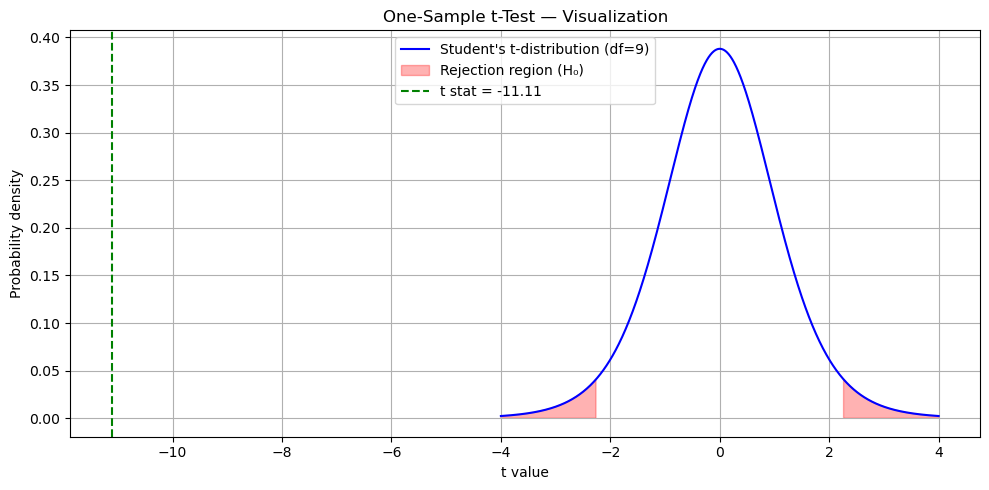

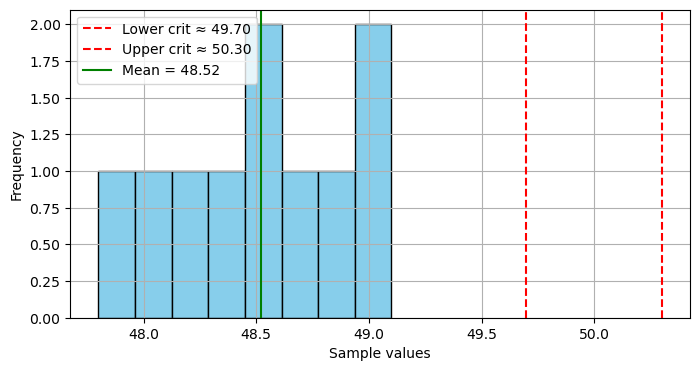

In [1]:
# Performing t-distribution and one-sample t-test for 10 candy bars,
# assuming the mean weight in the null hypothesis is 50 g.

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Sample data
sample = np.array([47.8, 48.2, 48.9, 49.0, 48.5, 48.1, 48.7, 49.1, 48.3, 48.6])
n = len(sample)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
sem = sample_std / np.sqrt(n)  # standard error of the mean

# 2. Test parameters
mu_0 = 50       # assumed population mean under H₀
alpha = 0.05    # significance level

# 3. One-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample, mu_0)

# 4. Hypotheses
print("Hypotheses:")
print("H₀: mean = 50")
print("H₁: mean ≠ 50 (two-tailed test)\n")

# 5. Test results
print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample standard deviation: {sample_std:.2f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.7f}")
print(f"Standard error of the mean (SEM): {sem:.4f}")

# 6. Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: the difference is statistically significant.")
else:
    print("Fail to reject the null hypothesis.")

# 7. t-distribution plot
df = n - 1  # degrees of freedom
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# critical regions
t_critical = stats.t.ppf(1 - alpha/2, df)
print(f"Critical value +/-: {-t_critical:.4f} and {t_critical:.4f} ")

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Student\'s t-distribution (df=9)', color='blue')
plt.fill_between(x, y, where=(x < -t_critical) | (x > t_critical), color='red', alpha=0.3, label='Rejection region (H₀)')
plt.axvline(t_statistic, color='green', linestyle='--', label=f't stat = {t_statistic:.2f}')
plt.title('One-Sample t-Test — Visualization')
plt.xlabel('t value')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Histogram of the sample values with critical region thresholds
# Critical values on the x-axis based on the sample
x_low = mu_0 - t_critical * sem   # lower critical threshold
x_high = mu_0 + t_critical * sem  # upper critical threshold

# Drawing the histogram
plt.figure(figsize=(8, 4))
plt.hist(sample, bins=8, color='skyblue', edgecolor='black')
plt.axvline(x_low, color='red', linestyle='--', label=f'Lower crit ≈ {x_low:.2f}')
plt.axvline(x_high, color='red', linestyle='--', label=f'Upper crit ≈ {x_high:.2f}')
plt.axvline(sample_mean, color='green', linestyle='-', label=f'Mean = {sample_mean:.2f}')
plt.xlabel('Sample values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
